In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
images_path = "/home/zamin/Documents/Visao-Computacional/data"
images = [img for img in os.listdir(images_path) if img != ".DS_Store"]

### GRAYSCALE


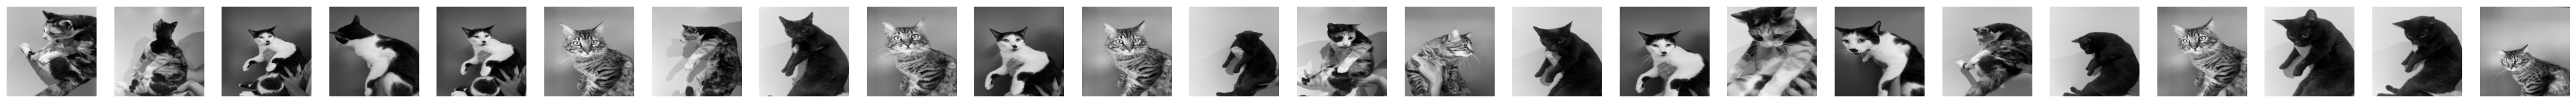

24

In [43]:
fig, axs = plt.subplots(1, len(images), figsize=(50, 50))
imgs_gray = []

def show_gray_scale(images):

    for i, image in enumerate(images):
        image_path = os.path.join(images_path, image)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img, (512, 512))
        imgs_gray.append(resized_img)
        axs[i].imshow(cv2.cvtColor(imgs_gray[i], cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
    plt.show()

show_gray_scale(images)
len(imgs_gray)

### BLUR

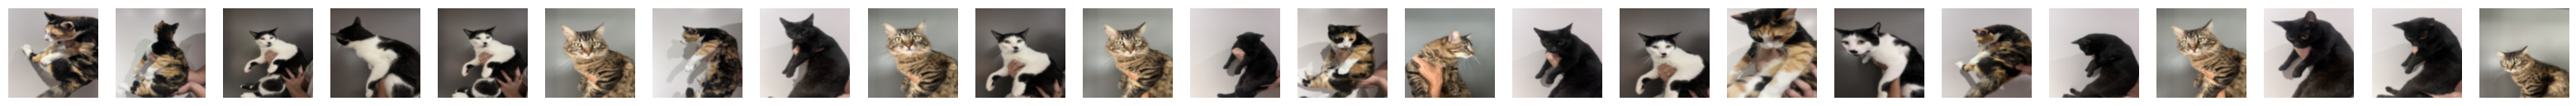

24

In [31]:
fig, axs = plt.subplots(1, len(images), figsize=(40, 40))
imgs_blur = []
def show_blur(images):
    
    for i, image in enumerate(images):
        image_path = os.path.join(images_path, image)
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (512, 512))
        blur = cv2.GaussianBlur(resized_img, (15, 15), 0)
        imgs_blur.append(blur)
        axs[i].imshow(cv2.cvtColor(imgs_blur[i], cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
    plt.show()

show_blur(images)
len(imgs_blur)

### DETECCAO DE CIRCULOS


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def plot_circles_in_single_image(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    if image is None:
        print("Imagem não encontrada.")
        return

    # Converter para escala de cinza e aplicar Gaussian blur
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Detecção de círculos
    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            cv2.circle(image, (x, y), 2, (0, 128, 255), 3)
    
    # Plotar a imagem
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Circles")
    plt.axis('off')
    plt.show()

# Uso da função
plot_circles_in_single_image('/home/zamin/Documents/Visao-Computacional/data/luna1.jpg')  # Substitua pelo caminho correto da sua imagem
